<a href="https://colab.research.google.com/github/NITIN9694/TensorFlow-Learning/blob/main/09_NLP_in_tensorflow_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

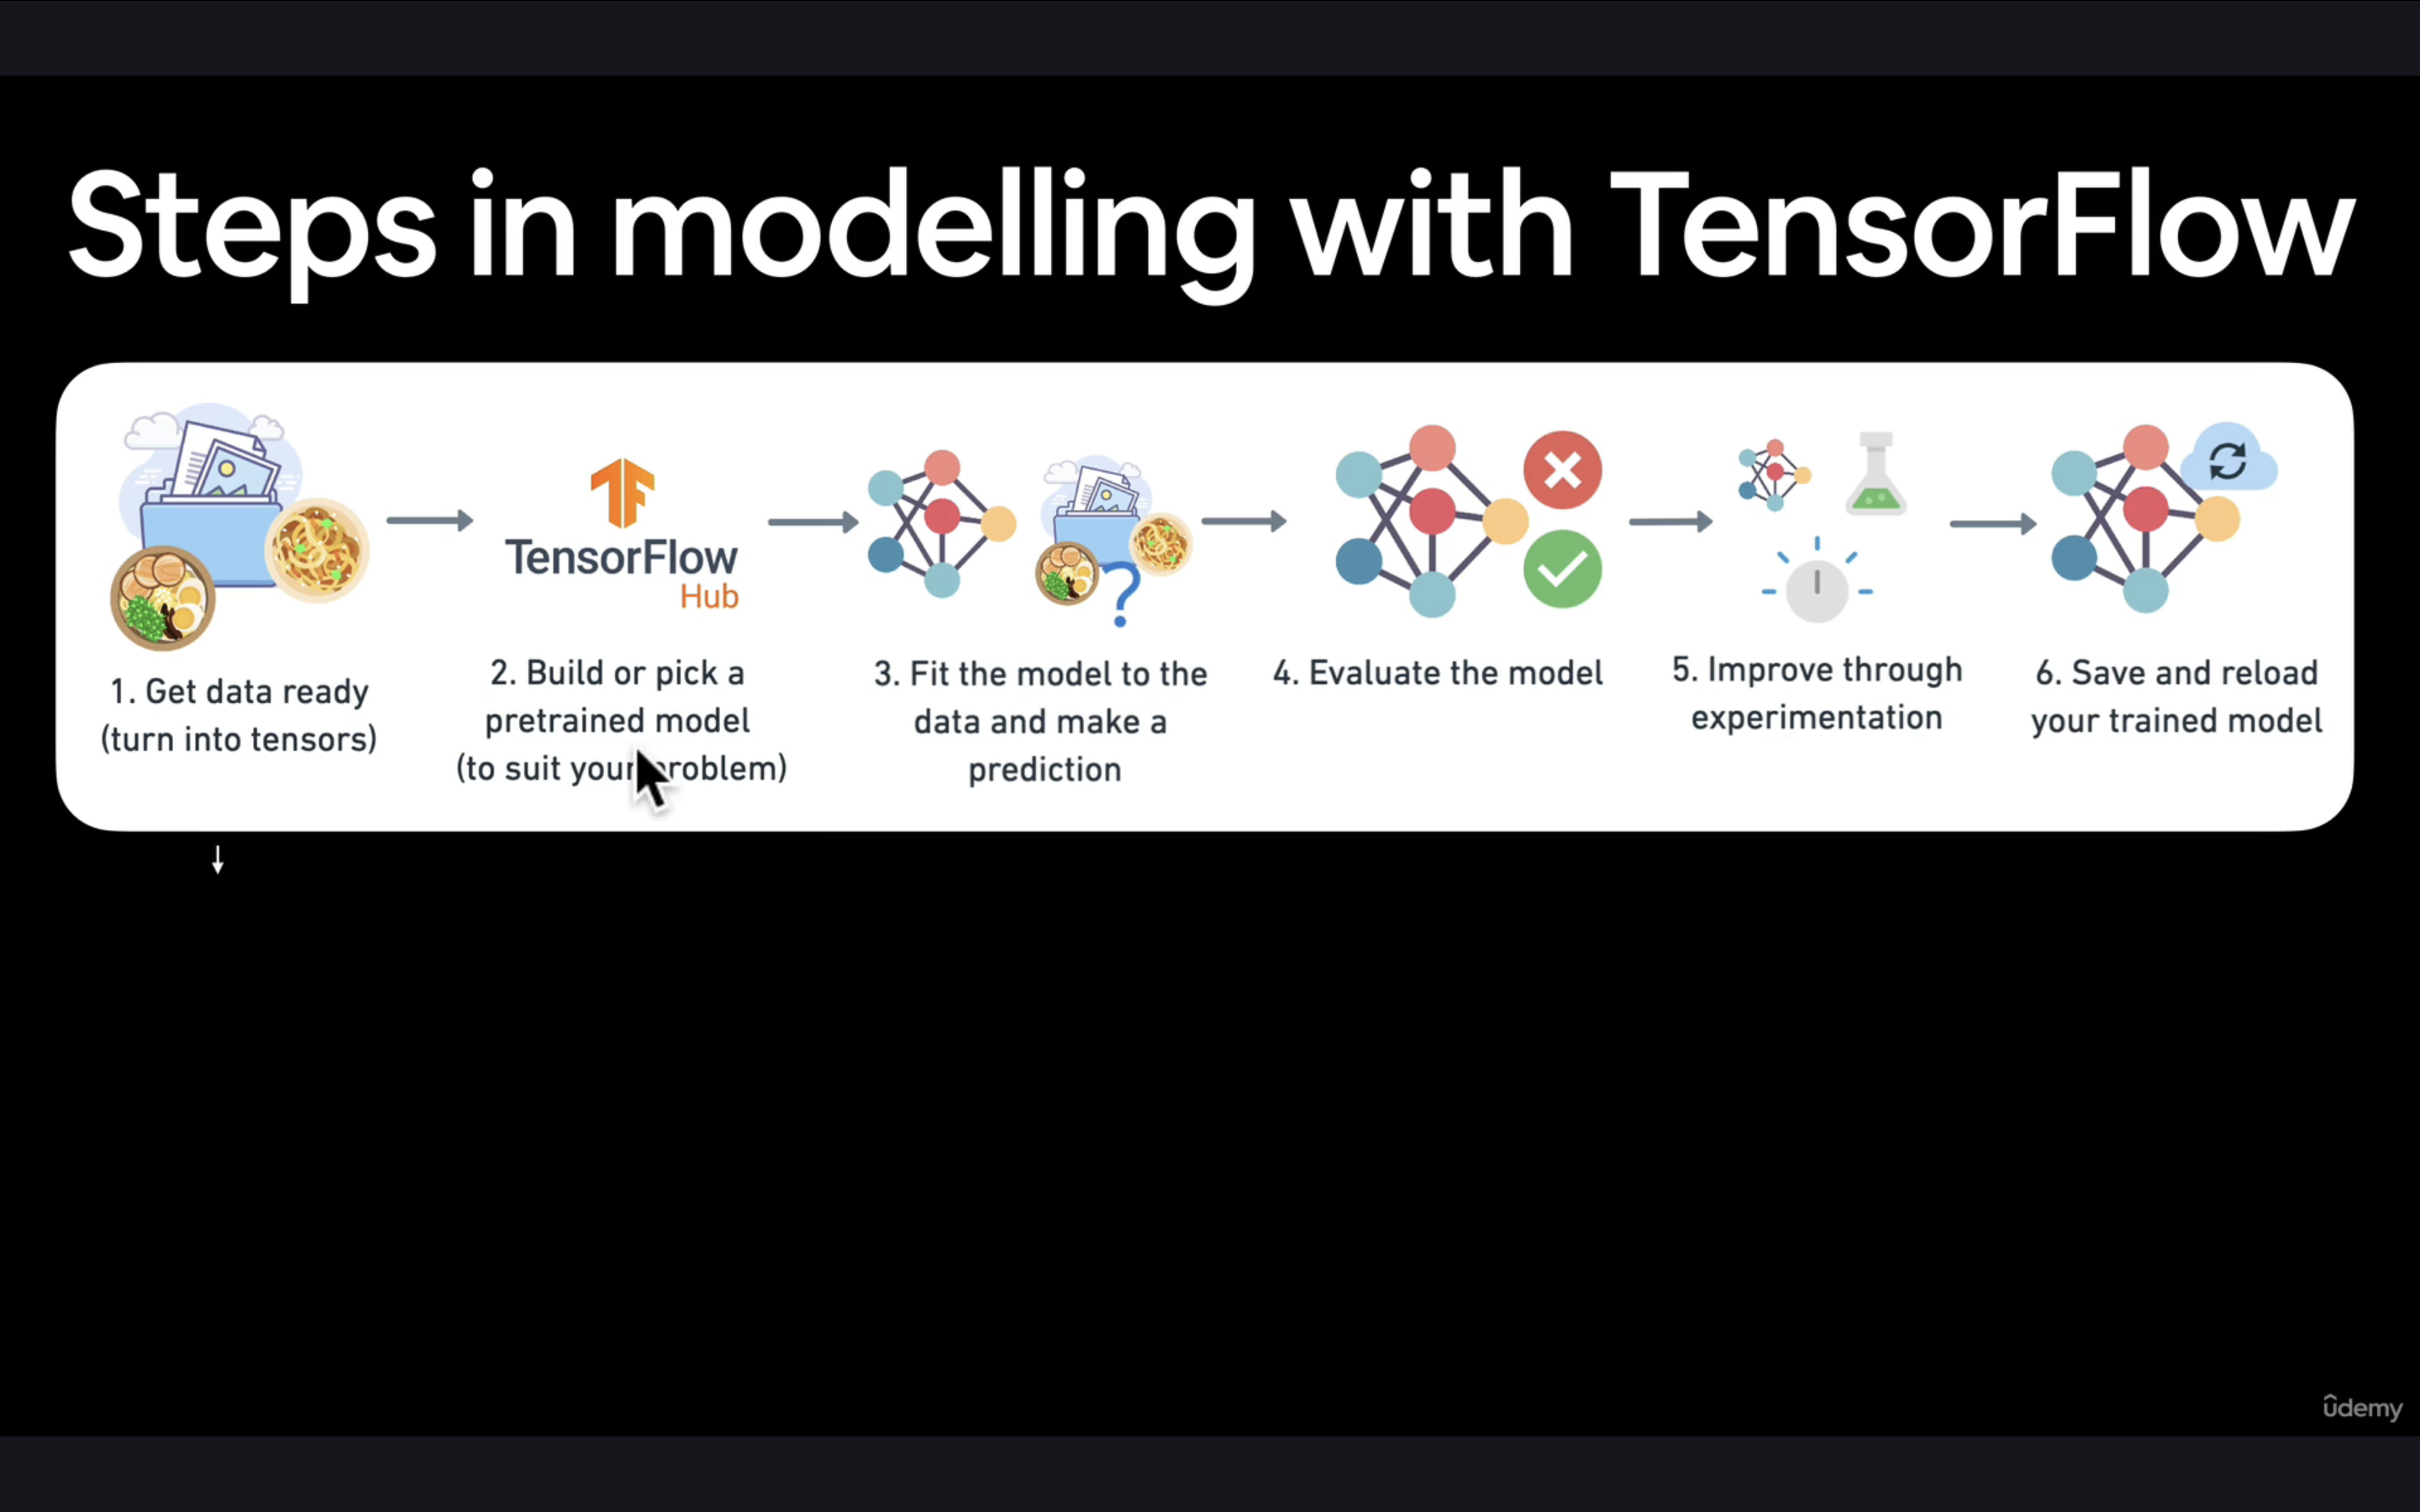

##Introducation to NLP Fundamental in TensorFlow

NLP has goal driving infromation out of natural language (could be sequence of text or speech)

Another term of NLP problem is sequence to sequence problem

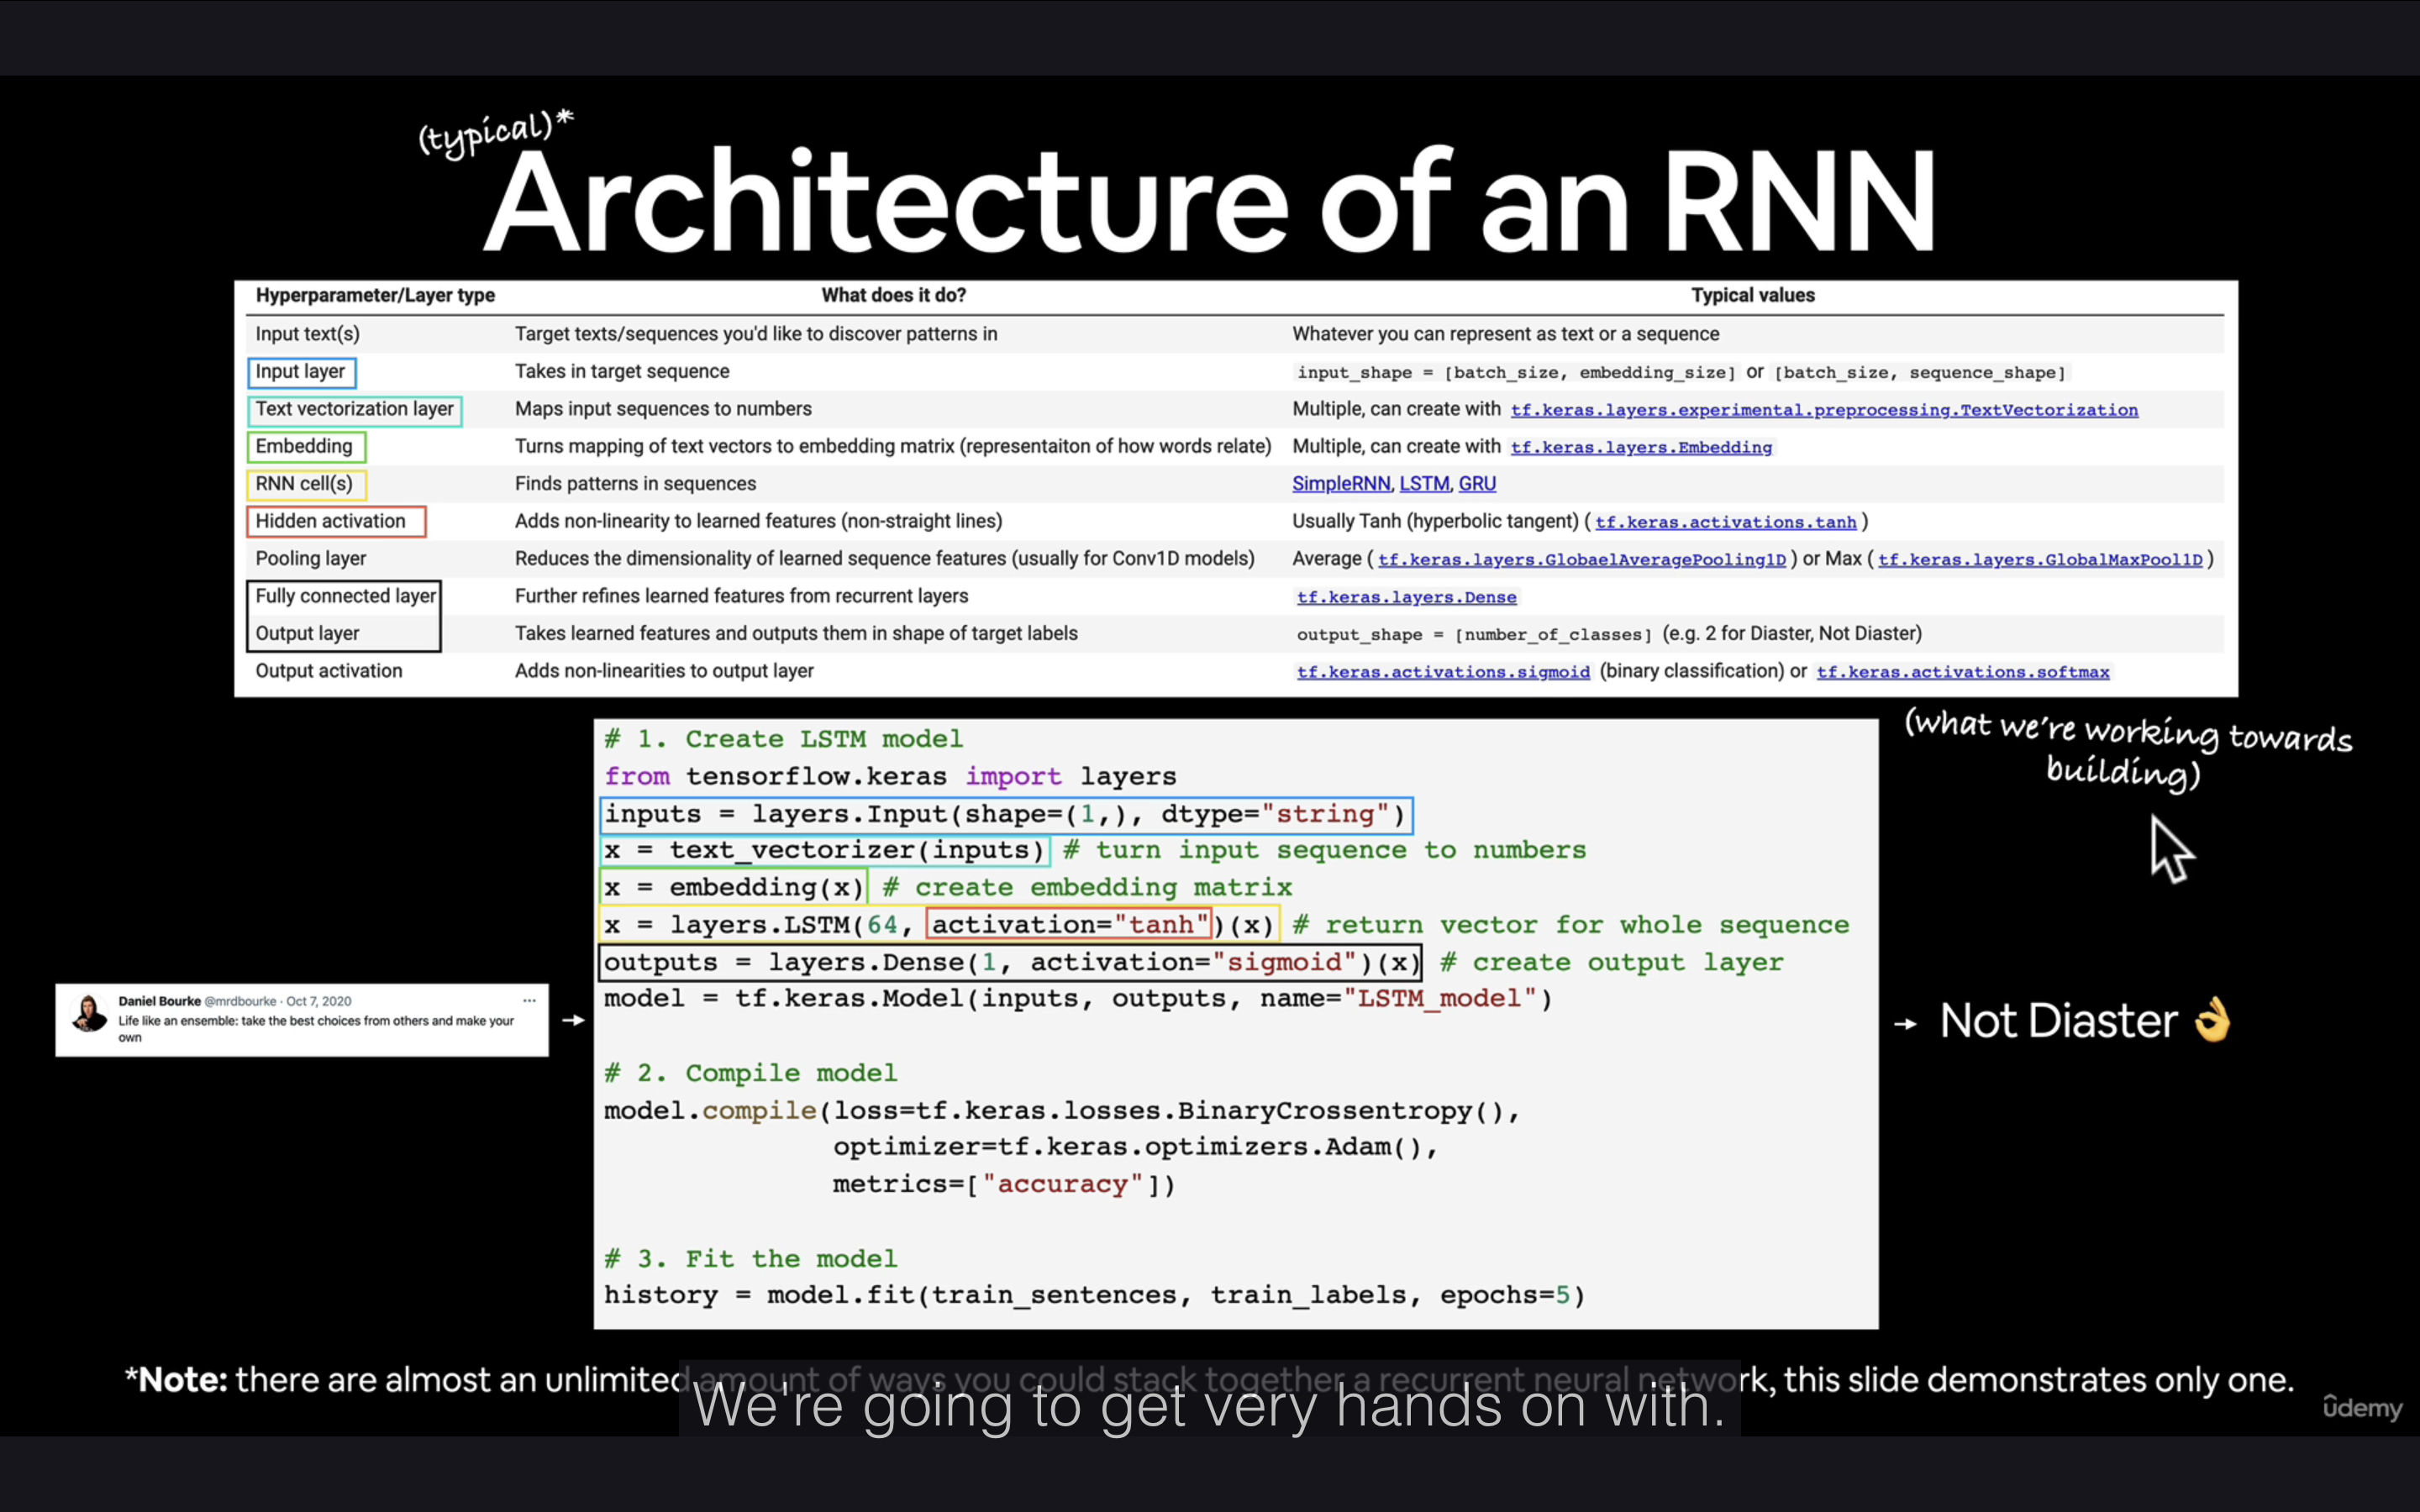

#Check the GPU


In [3]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-3488fe47-25fa-41a9-b398-bb8b842ceb3c)


#Get Helper funcation

In [4]:
!wget  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/refs/heads/main/extras/helper_functions.py

--2025-10-11 19:08:53--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/refs/heads/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2025-10-11 19:08:53 (133 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [7]:
# import helper funcation
from helper_functions import unzip_data, create_tensorboard_callback, plot_loss_curves, compare_historys

#Get text dataset
The dataset we're going to use kaggle introducation to NLP dataset(text sample of Tweet labelled as diaster or not diaster ).





In [8]:
!wget https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip

--2025-10-11 19:22:08--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.200.207, 74.125.130.207, 74.125.68.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.200.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K   710KB/s    in 0.8s    

2025-10-11 19:22:10 (710 KB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



In [10]:
unzip_data("nlp_getting_started.zip")